## Alphabet Recognition System using Convolutional Neural Network (CNN)

Convolutional Neural Network (CNN) is a Deep Learning Algorithm widely used for character recognition. This algorithm identifies the alphabet from the given input image.

The accuracy achieved using this algorithm is 93.42%.

## 1. Anvil Integration

In [1]:
import anvil.server
import anvil.media
anvil.server.connect("44STZQZQTYAAVHHWGRPMXDRN-P5VUQGPD3HW5UMWJ")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK


In [106]:
pip install pyttsx3

Note: you may need to restart the kernel to use updated packages.


In [135]:
import string
import random
#randomLetter = 'h'
randomLetter = random.choice(string.ascii_letters)
modified_string = randomLetter.translate({ord('h'): None, ord('q'): None})
#print(randomLetter)

import pyttsx3
text_speech=pyttsx3.init()
#ans=input()
text_speech.say("Please write the letter")
text_speech.say(randomLetter)
text_speech.runAndWait()



## 2. Importing Libraries

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import os
import pickle
import tensorflow as tf

## 3. Defining the Model Architecture

In [74]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 26, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## 4. Importing the Dataset

In [75]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = 'Training',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

test_generator = test_datagen.flow_from_directory(
    directory = 'Testing',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

Found 501 images belonging to 26 classes.
Found 261 images belonging to 26 classes.


## 5. Training the Model

In [76]:
history = model.fit_generator(train_generator,
                         steps_per_epoch = 16,
                         epochs = 3,
                         validation_data = test_generator,
                         validation_steps = 16)

Epoch 1/3


C:\Users\Shree\AppData\Local\Temp\ipykernel_11576\2069286868.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


16/16 [==============================] - 3s 112ms/step - loss: 3.1301 - accuracy: 0.1457 - val_loss: 2.8933 - val_accuracy: 0.1839
Epoch 2/3
16/16 [==============================] - 1s 78ms/step - loss: 2.1835 - accuracy: 0.4571
Epoch 3/3
16/16 [==============================] - 1s 73ms/step - loss: 1.0424 - accuracy: 0.6866


## 6. Saving/Loading the Model

In [77]:
pickle.dump(model, open('CNN_model.sav', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-11 18:52:55         3090
metadata.json                                  2023-03-11 18:52:55           64
variables.h5            

In [78]:
model = pickle.load(open('CNN_model.sav','rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-11 18:52:54         3090
metadata.json                                  2023-03-11 18:52:54           64
variables.h5                                   2023-03-11 18:52:54      1965088
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
......

## 7. Testing the Model

In [91]:
def get_result(result):
    if result[0][0] == 1:
        return('a')
    elif result[0][1] == 1:
        return ('b')
    elif result[0][2] == 1:
        return ('c')
    elif result[0][3] == 1:
        return ('d')
    elif result[0][4] == 1:
        return ('e')
    elif result[0][5] == 1:
        return ('f')
    elif result[0][6] == 1:
        return ('g')
    elif result[0][7] == 1:
        return ('h')
    elif result[0][8] == 1:
        return ('i')
    elif result[0][9] == 1:
        return ('j')
    elif result[0][10] == 1:
        return ('k')
    elif result[0][11] == 1:
        return ('l')
    elif result[0][12] == 1:
        return ('m')
    elif result[0][13] == 1:
        return ('n')
    elif result[0][14] == 1:
        return ('o')
    elif result[0][15] == 1:
        return ('p')
    elif result[0][16] == 1:
        return ('q')
    elif result[0][17] == 1:
        return ('r')
    elif result[0][18] == 1:
        return ('s')
    elif result[0][19] == 1:
        return ('t')
    elif result[0][20] == 1:
        return ('u')
    elif result[0][21] == 1:
        return ('v')
    elif result[0][22] == 1:
        return ('w')
    elif result[0][23] == 1:
        return ('x')
    elif result[0][24] == 1:
        return ('y')
    elif result[0][25] == 1:
        return ('z')

1/1 [==============================] - 0s 39ms/step
Predicted Alphabet is: l


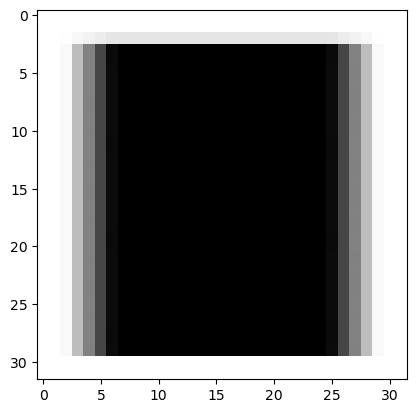

In [136]:
filename = r'Testing/'+randomLetter+'/24.png'
test_image = tf.keras.utils.load_img(filename, target_size = (32,32))
plt.imshow(test_image)
test_image =  tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
result = get_result(result)
print ('Predicted Alphabet is: {}'.format(result))

## 8. Predicting the Alphabet from the Input Image

This part of code is receives the input image from the anvil website and returns the predicted alphabet back to the website.

In [31]:
@anvil.server.callable
def model_run(path):
    with anvil.media.TempFile(path) as filename:
        test_image = image.load_img(filename, target_size = (32,32))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = model.predict(test_image)
        result = get_result(result)
        return ('Predicted Alphabet is: {}'.format(result))
        